<html>
<div>
  <img src="https://www.engineersgarage.com/wp-content/uploads/2021/11/TCH36-01-scaled.jpg" width=360px width=auto style="vertical-align: middle;">
  <span style="font-family: Georgia; font-size:30px; color: white;"> <br/> University of Tehran <br/> AI_CA5 <br/> Spring 02 </span>
</div>
<span style="font-family: Georgia; font-size:15pt; color: white; vertical-align: middle;"> low_mist - std id: 810100186 </span>
</html>

In this notebook we are to learn about machine learning and try to anticipate price of houses.

## Problem Description
in this problem we will learn about basics of machine learning, in order to assign prices to houses. At first we try to do that by using linear regression without any library, and then we use Scikit-Learn to do that.

## Dataset
The `house_data.csv` file contains data about houses and their prices in one of the cities of Washington, D.C. in years 2014 and 2015. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from copy import deepcopy
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import category_encoders as cat_enc
from mlxtend.evaluate import bias_variance_decomp

DATASET_PATH = "assets/house_data.csv"

In [3]:
df = pd.read_csv(DATASET_PATH)
pd.set_option("display.max_columns", None)
df.head(10)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,style,house_age
0,0,0,0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650,1.0,0,0,3,7,1180,0.0,1955.0,0,98178,47.5112,-122.257,1340,5650,Suburban,Contemporary,67
1,1,1,1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242,NaN,0,0,3,7,2170,400.0,NaN,1991,98125,47.7210,-122.319,1690,7639,Suburban,Ranch,71
2,2,2,2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000,1.0,0,0,3,6,770,0.0,1933.0,0,98028,47.7379,-122.233,2720,8062,Rural,Victorian,89
3,3,3,3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000,1.0,0,0,5,7,1050,910.0,1965.0,0,98136,47.5208,-122.393,1360,5000,Urban,Colonial,57
4,4,4,4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080,1.0,0,0,3,8,1680,0.0,1987.0,0,98074,47.6168,-122.045,1800,7503,Suburban,Cape Cod,35
5,5,5,5,7237550310,20140512T000000,1230000.0,4,4.50,5420.0,101930,1.0,0,0,3,11,3890,1530.0,2001.0,0,98053,47.6561,-122.005,4760,101930,Urban,Colonial,21
6,6,6,6,1321400060,20140627T000000,257500.0,3,2.25,1715.0,6819,2.0,0,0,3,7,1715,0.0,1995.0,0,98003,47.3097,-122.327,2238,6819,Urban,Ranch,27
7,7,7,7,2008000270,20150115T000000,291850.0,3,1.50,1060.0,9711,NaN,0,0,3,7,1060,0.0,NaN,0,98198,47.4095,-122.315,1650,9711,Rural,Ranch,59
8,8,8,8,2414600126,20150415T000000,229500.0,3,1.00,NaN,7470,1.0,0,0,3,7,1050,730.0,1960.0,0,98146,47.5123,-122.337,1780,8113,Rural,Ranch,62
9,9,9,9,3793500160,20150312T000000,323000.0,3,2.50,NaN,6560,2.0,0,0,3,7,1890,0.0,2003.0,0,98038,47.3684,-122.031,2390,7570,Urban,Ranch,19


## Part1. Analysis of datasets
### Q1-1. Describe dataset using info and describe methods.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.2   21613 non-null  int64  
 1   Unnamed: 0.1   21613 non-null  int64  
 2   Unnamed: 0     21613 non-null  int64  
 3   id             21613 non-null  int64  
 4   date           21613 non-null  object 
 5   price          21613 non-null  float64
 6   bedrooms       21613 non-null  int64  
 7   bathrooms      21613 non-null  float64
 8   sqft_living    18528 non-null  float64
 9   sqft_lot       21613 non-null  int64  
 10  floors         18530 non-null  float64
 11  waterfront     21613 non-null  int64  
 12  view           21613 non-null  int64  
 13  condition      21613 non-null  int64  
 14  grade          21613 non-null  int64  
 15  sqft_above     21613 non-null  int64  
 16  sqft_basement  21184 non-null  float64
 17  yr_built       18531 non-null  float64
 18  yr_ren

The `info` method returns general info about the dataframe, its data, and the data types.

The panda's dataframe's is printed and we can see that there are 21613 entries in the dataframe.  
There are 26 columns and for each of them, the column's name, its data types, and the non-null count is shown.  
Non-null count shows how many rows have a value in a specific column.  
At the end, the count of each data type among the columns and the structure's memory usage is shown.

In [5]:
df.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21613.00000,21613.00000,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,18528.000000,2.161300e+04,18530.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21184.000000,18531.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,10806.00000,10806.00000,4.580302e+09,5.401822e+05,3.367464,2.111900,2077.569031,1.510697e+04,1.492903,0.007542,0.234303,3.409430,7.645722,1788.390691,292.121082,1970.896714,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,50.994864
std,6239.28002,6239.28002,6239.28002,2.876566e+09,3.673622e+05,0.943028,0.780697,953.971679,4.142051e+04,0.538562,0.086517,0.766318,0.650743,2.020809,828.090978,442.637777,29.406420,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411
min,0.00000,0.00000,0.00000,1.000102e+06,7.500000e+04,-5.000000,-5.000000,-33323.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,-234.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5403.00000,5403.00000,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,25.000000
50%,10806.00000,10806.00000,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,47.000000
75%,16209.00000,16209.00000,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1996.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,71.000000
max,21612.00000,21612.00000,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


The `describe` method shows some statistical information about the dataframe.

Each table row reports a property of the corresponding column's data:  

- count: The number of the data.
- mean: The average of the data.
- std: The standard deviation of the data.
- min: The minimum data.
- 25%: The first quartile of the column's data.
- 50%: The median of the column's data.
- 75%: The third quartile of the column's data.
- max: The maximum data.

### Q1-2. For each feature show number and proportion of missing values.

In [6]:
def missing_values(df: pd.DataFrame) -> pd.DataFrame:
    nan_values_count = df.isna().sum()
    nan_values_percent = nan_values_count / len(df)
    nan_values = pd.concat([nan_values_count, nan_values_percent], axis=1, keys=["Missing", "Percentage"])
    return nan_values
    return nan_values[nan_values["Missing"] != 0] # this one is better but I need to 
                                                  # show the missing values for every value in report

missing_values(df)

,Missing,Percentage
Unnamed: 0.2,0,0.000000
Unnamed: 0.1,0,0.000000
Unnamed: 0,0,0.000000
id,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,3085,0.142738
sqft_lot,0,0.000000


### Q1-3. Plotting the correlation graph between the features. Which features are most correlated with target?

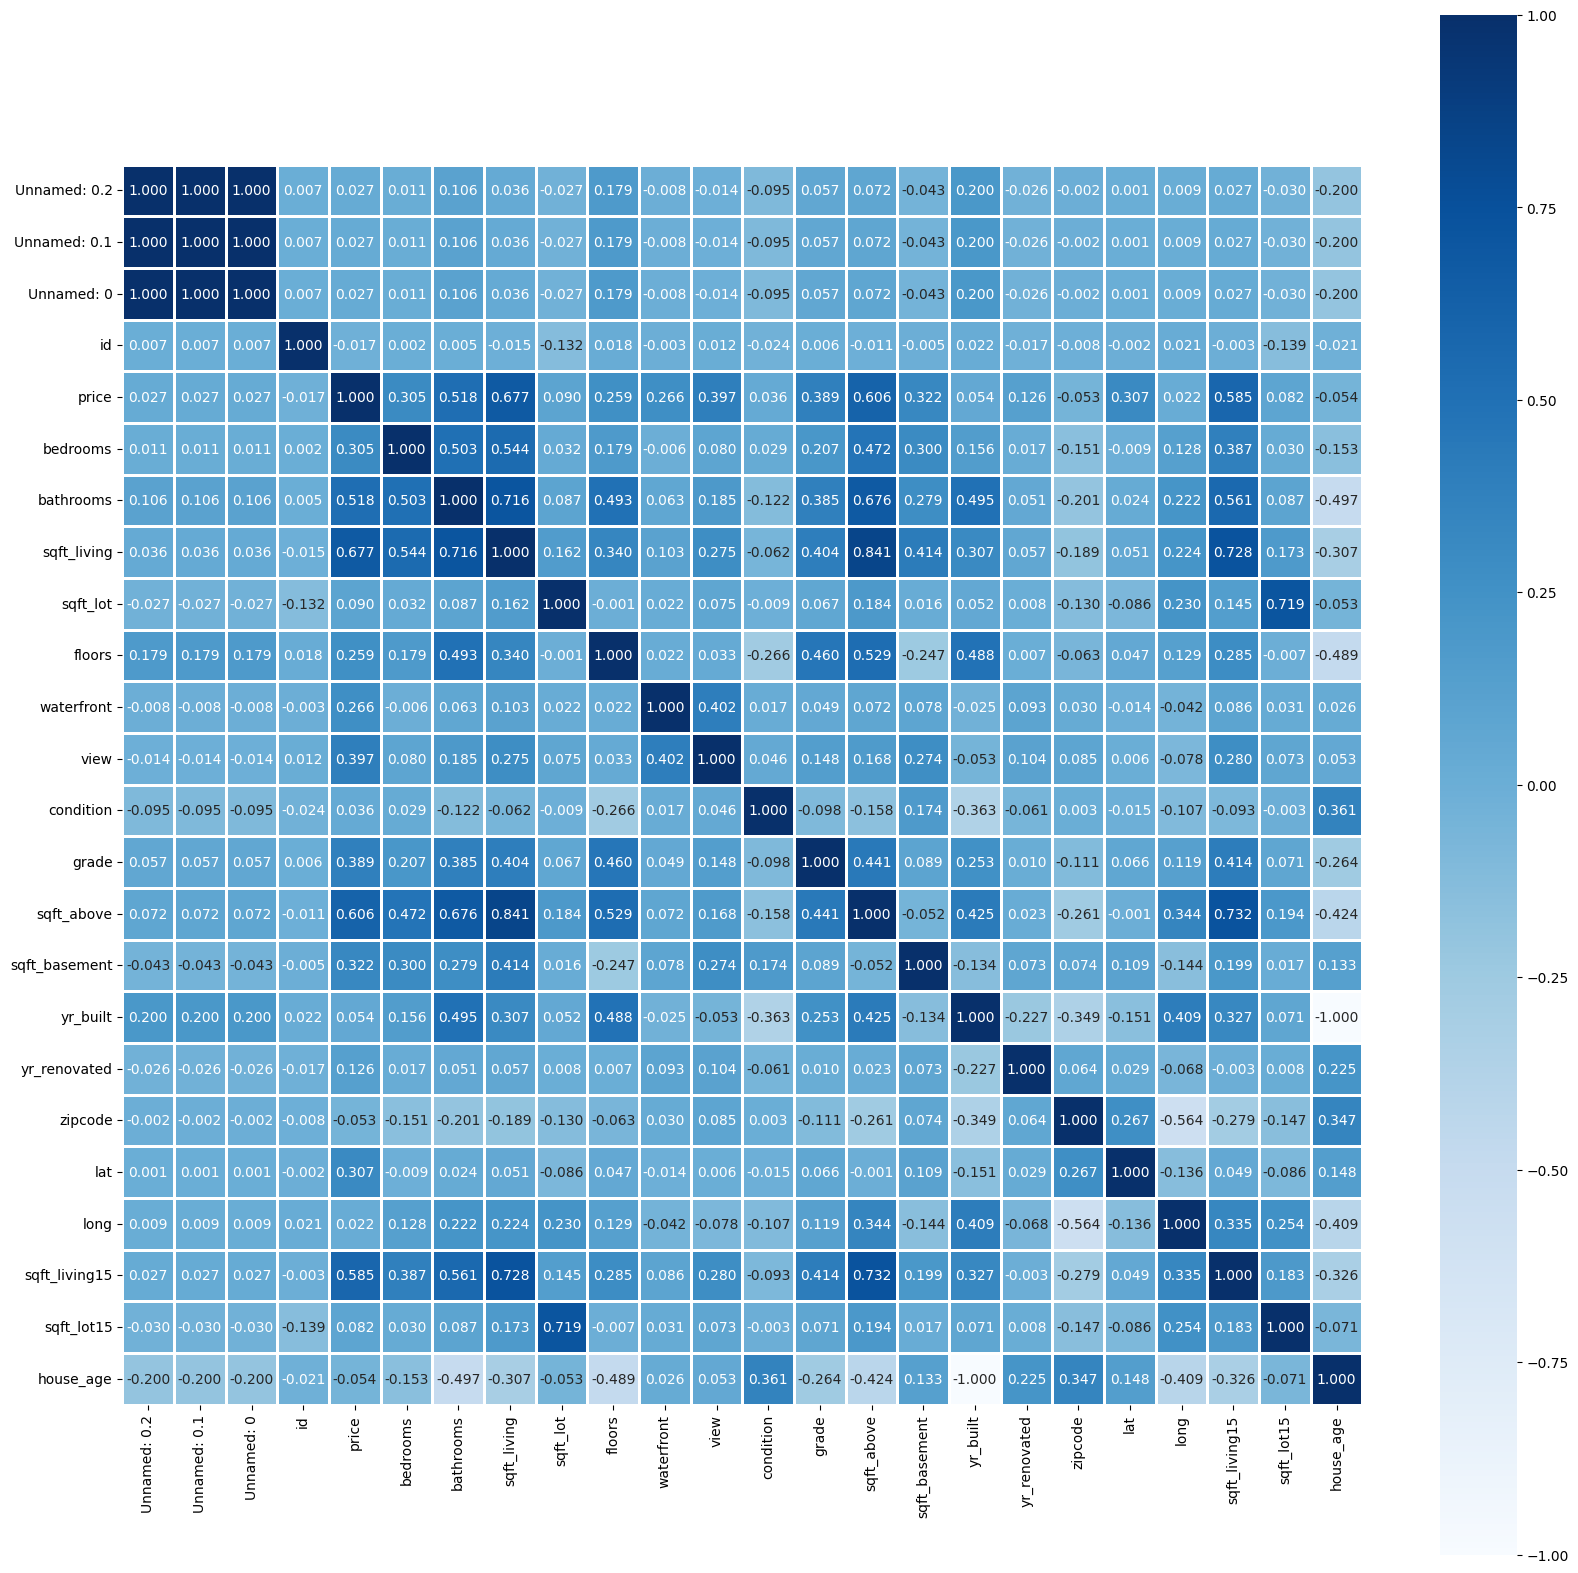

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".3f", cmap="Blues", linewidths=1, square=True)
plt.show()

To see what features have the most correlation with the outcome, we can simply use the price row in `df.corr()`.

In [8]:
price_corr = df.corr(numeric_only=True)["price"].drop("price")
price_corr = price_corr[abs(price_corr) > 0.31].sort_values(ascending=False)
display(price_corr)

sqft_living      0.676542
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.517952
view             0.397346
grade            0.389227
sqft_basement    0.321825
Name: price, dtype: float64

As we can see, square foot-related features namely `sqft_living`, `sqft_above` and `sqft_living15`, has the most correlation with the outcome.

### Q1-4. Plot unique values for each feature of last part.

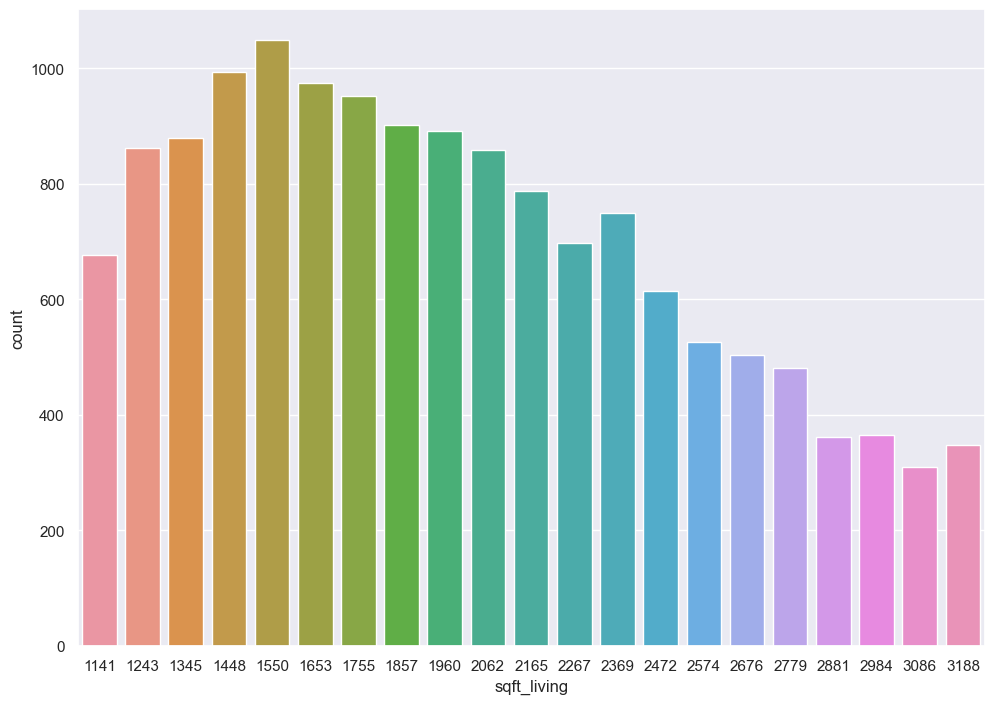

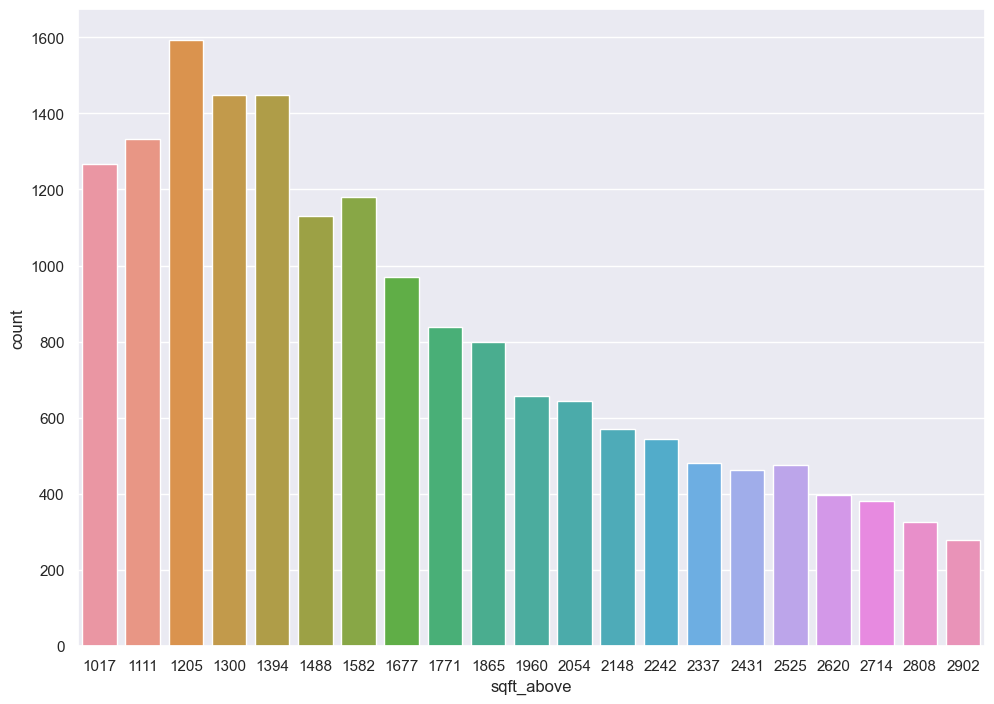

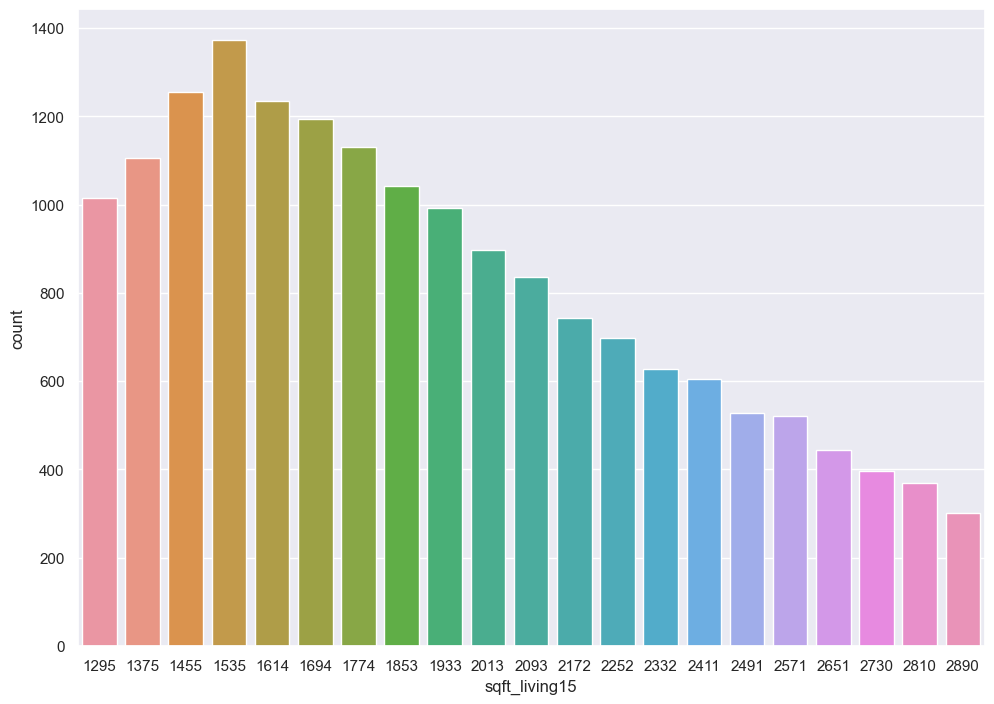

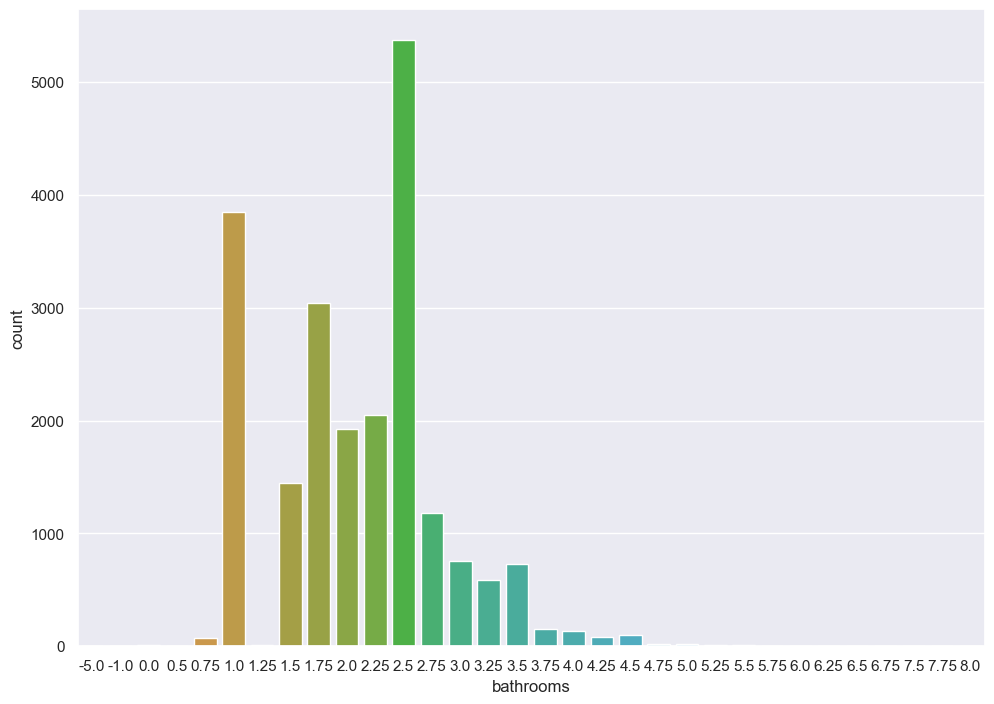

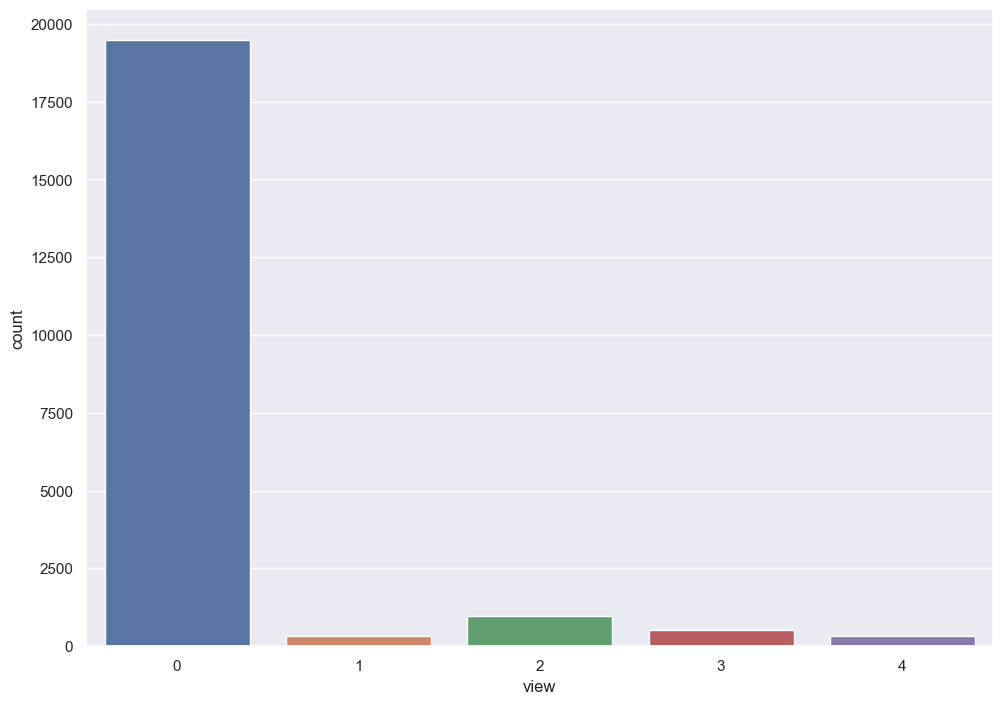

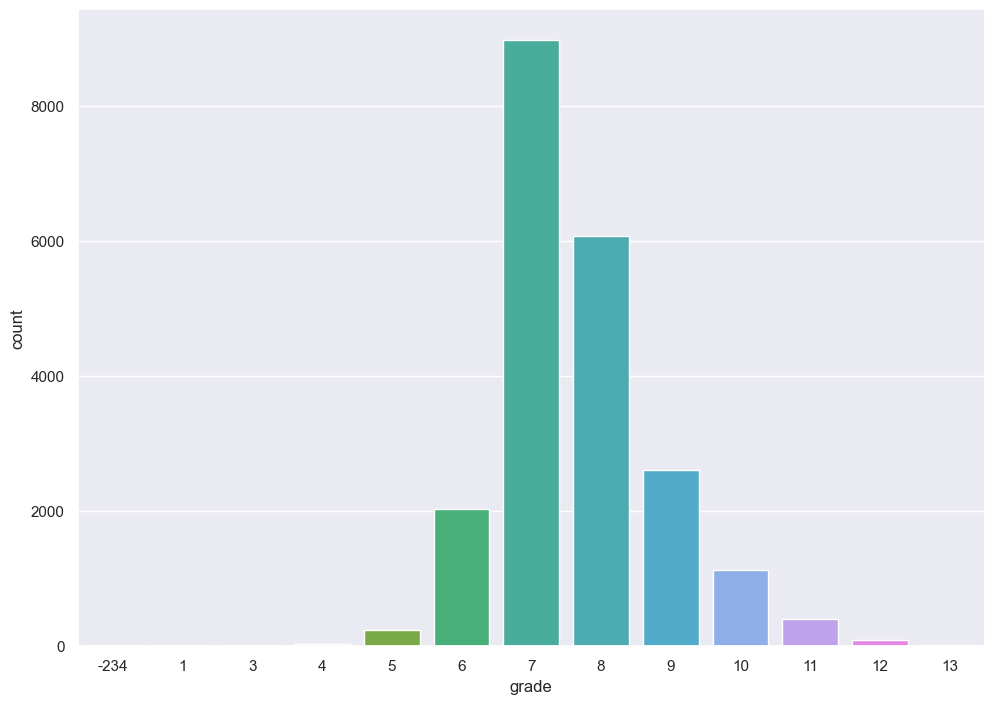

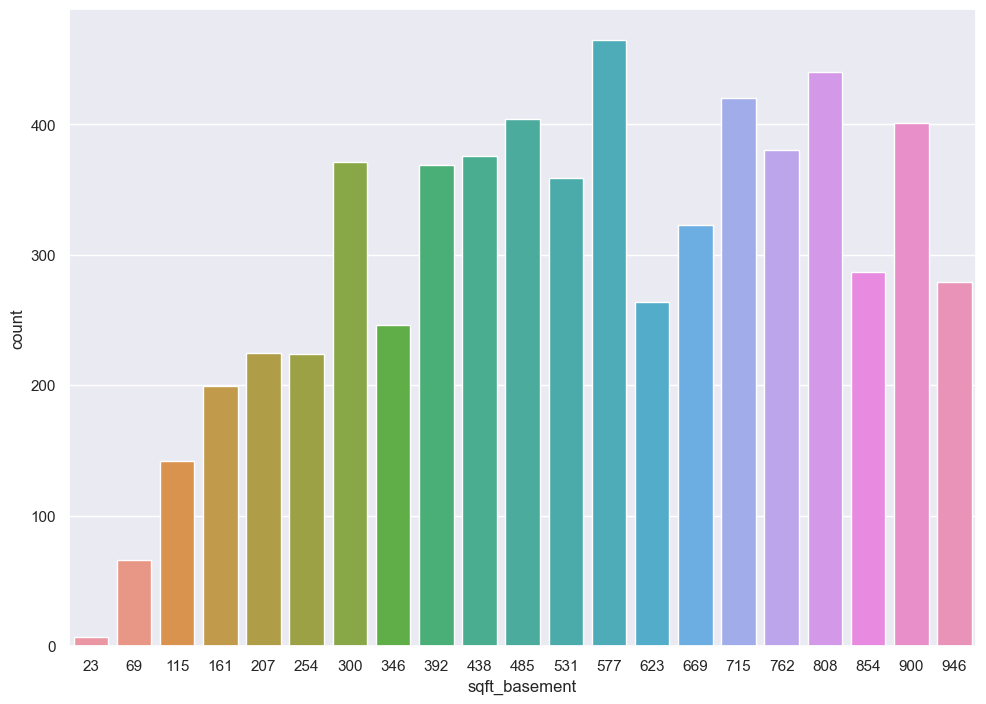

In [9]:
NUM_OF_INTERVALS = 20
df_backup = deepcopy(df)

sns.set(rc={'figure.figsize':(11.7,8.27)})

for col in price_corr.index.to_list():
    if df[col].quantile(0.9) - df[col].quantile(0.1) < 20:
        sns.countplot(x=col, data=df)
        plt.show()
    else:
        intervals = pd.interval_range(start=df[col].quantile(0.1), end=df[col].quantile(0.9), periods=NUM_OF_INTERVALS + 1)
        interval_tuples = [(interval.left, interval.right) for interval in intervals]
        bins = pd.IntervalIndex.from_tuples(interval_tuples)
        df[col] = pd.cut(df[col], bins)
        ax = sns.countplot(x=col, data=df)
        ax.set_xticklabels([f'{int(np.mean(interval))}' for interval in interval_tuples])
        plt.show()


### Q1-5. Plotting the relationship between the features using hexbin and scatter plots.

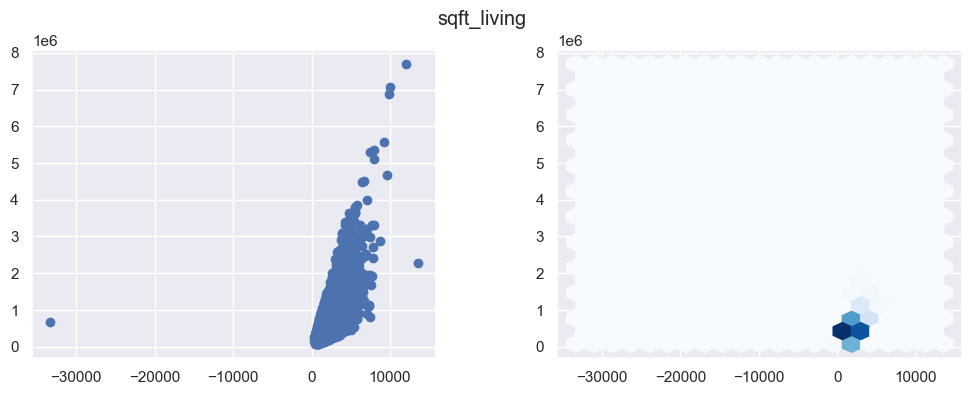

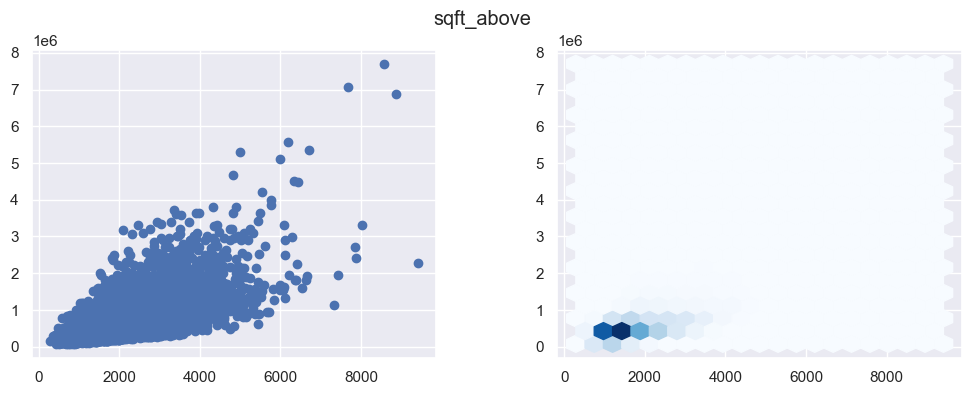

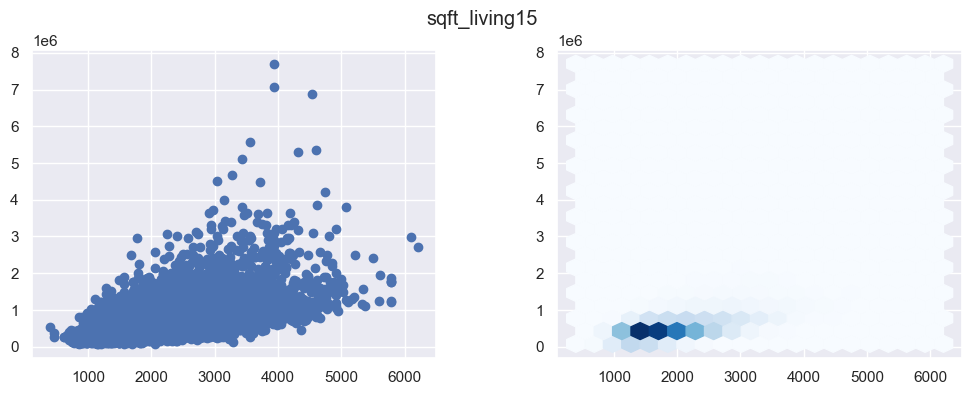

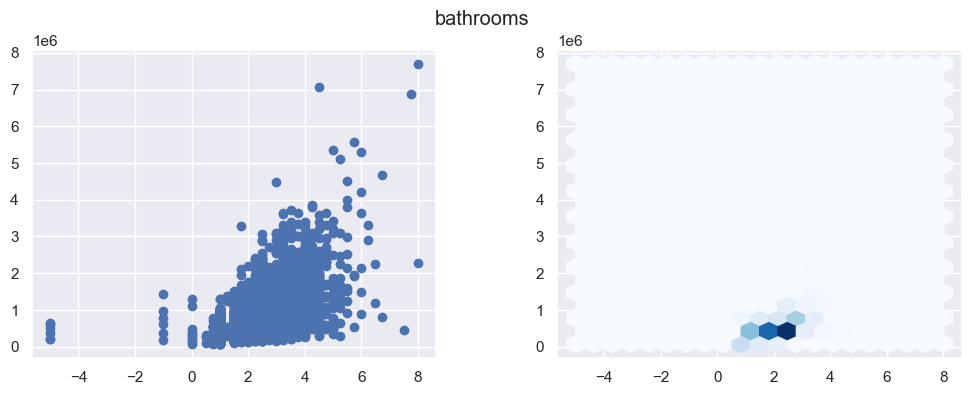

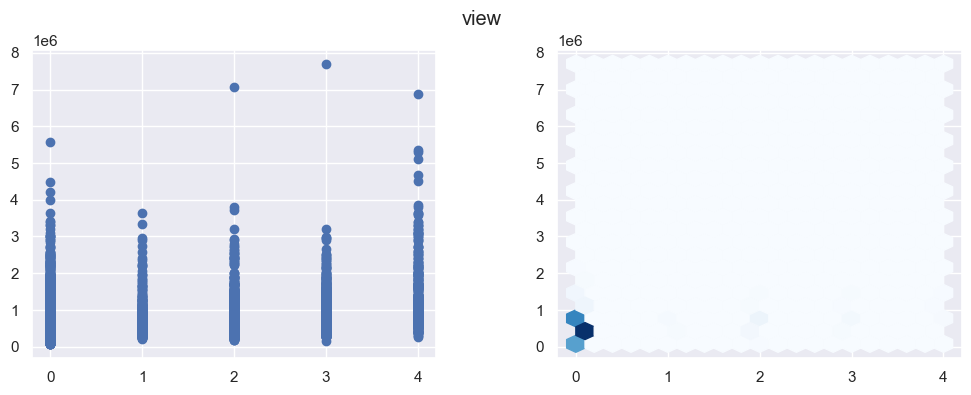

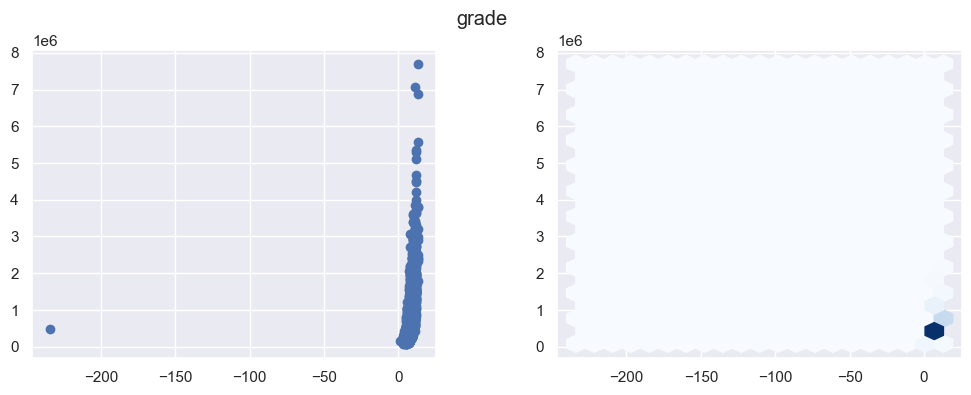

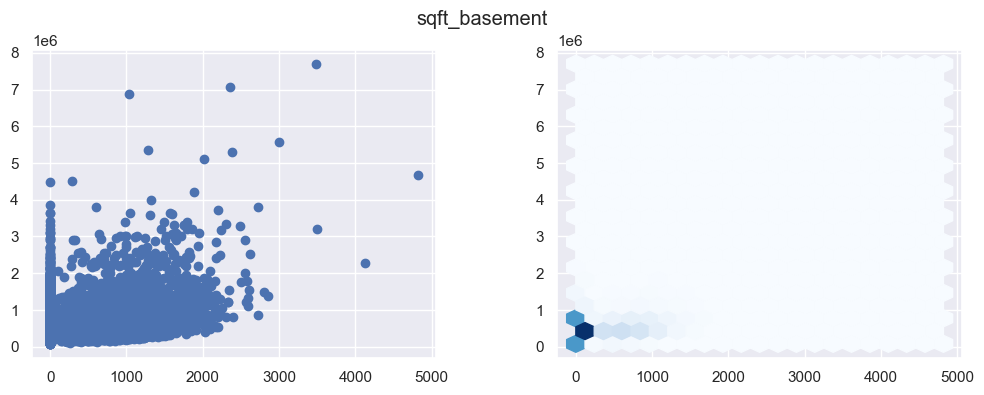

In [10]:
df = deepcopy(df_backup)

def plot_corr_scatter_hexbin(col):
    fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
    plt.suptitle(col)
    axs[0].scatter(df[col], df["price"])
    axs[1].hexbin(df[col], df["price"], gridsize=20, cmap="Blues")
    plt.subplots_adjust(wspace=0.3)
    plt.show()

for col in price_corr.index:
    plot_corr_scatter_hexbin(col)

### Q1-6. Use other methods to analyze the data.

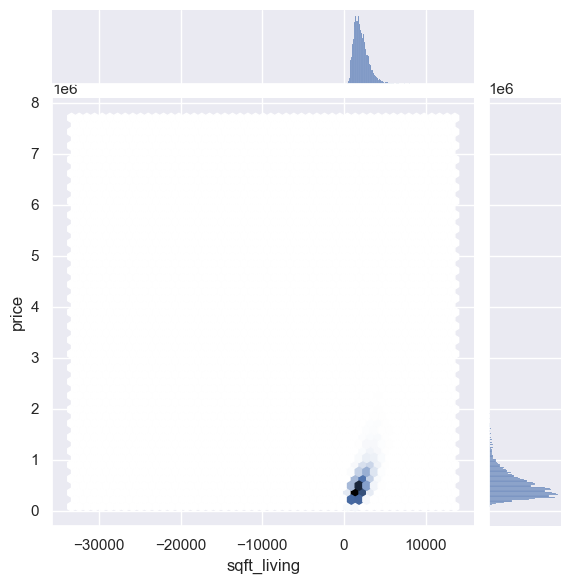

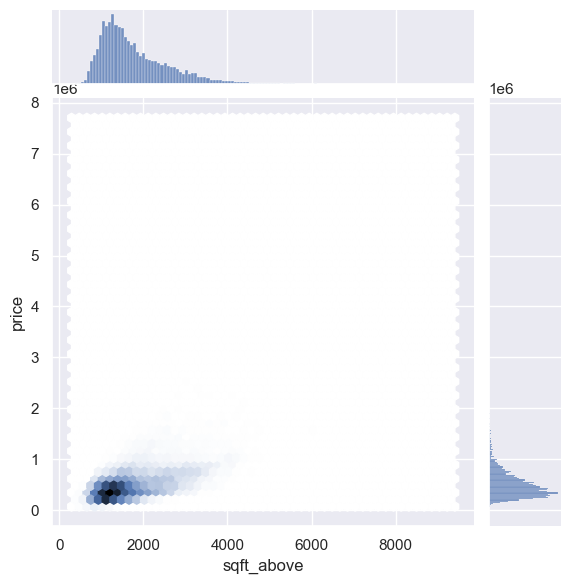

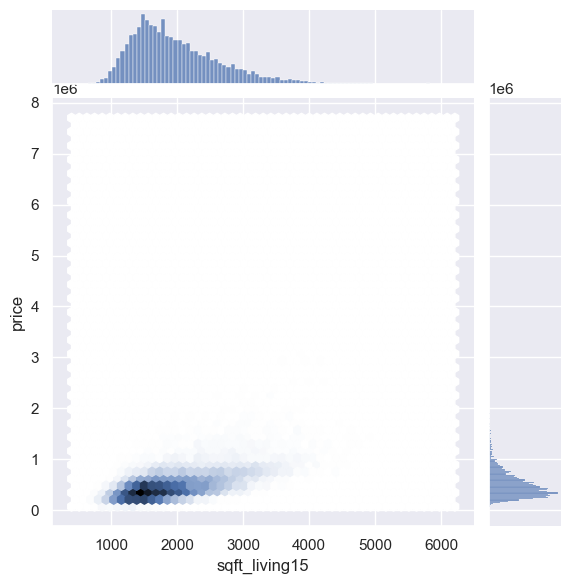

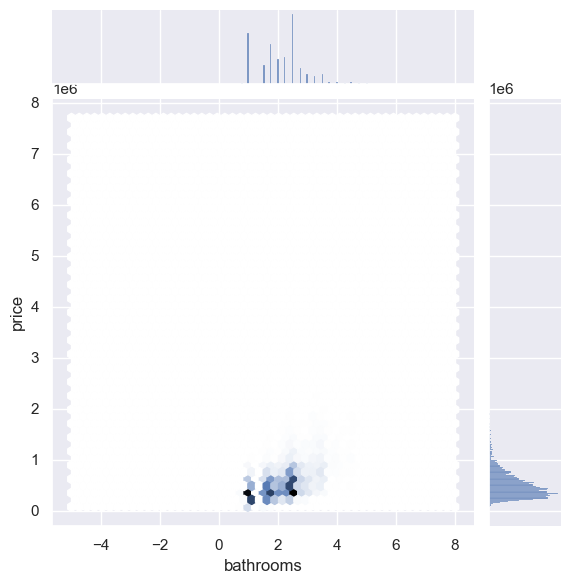

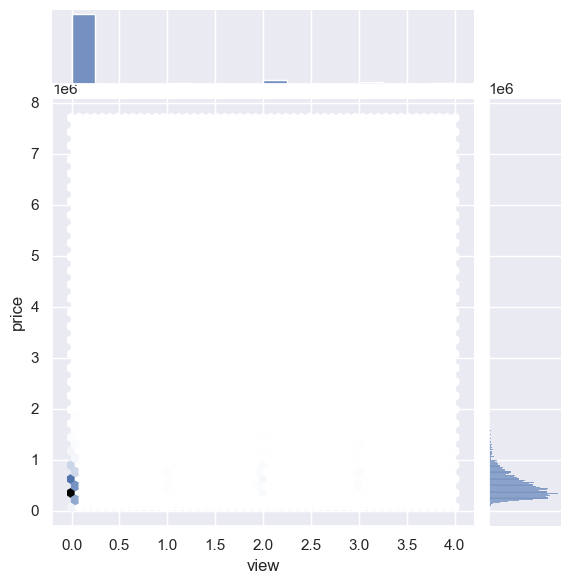

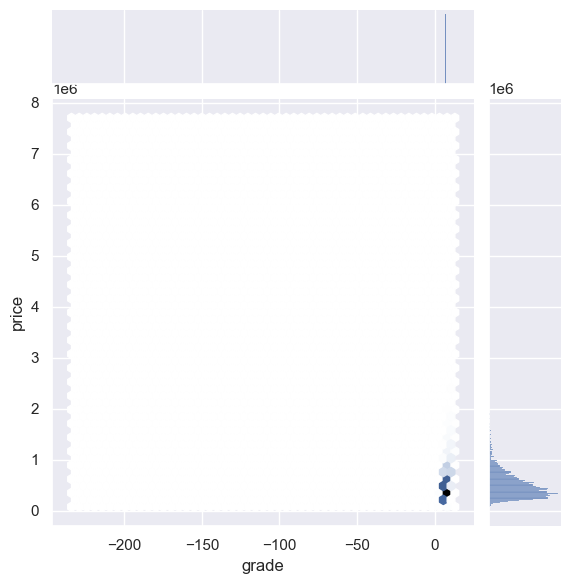

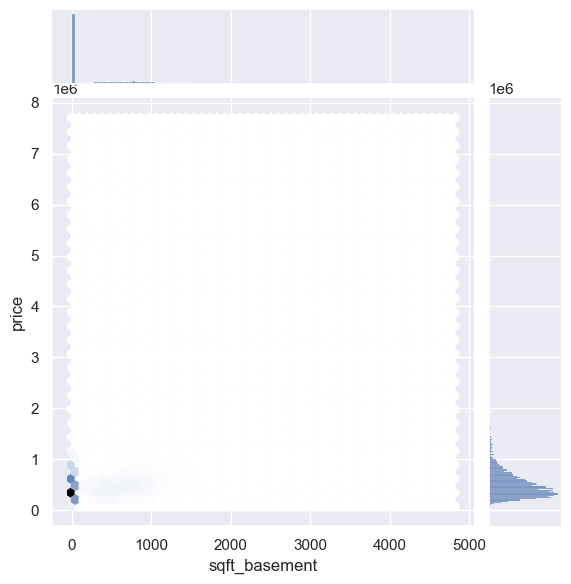

In [11]:
def plot_corr_joint(col):
    sns.jointplot(x=col, y="price", data=df, kind="hex")

for col in price_corr.index:
    plot_corr_joint(col)

## Part 2. Preprocessing

First we need to delete some invalid values such as negative values for number of bathrooms and so forth.

In [12]:
negative_columns = ["bedrooms", "bathrooms", "sqft_living", "grade"]
df[negative_columns] = np.where(df[negative_columns] < 0, np.nan, df[negative_columns])

### Q2-1. How to handle missing values.
Missing values in machine learning projects can be a significant hindrance to accurate results. However, there are multiple ways to deal with it during the preprocessing stage to minimize their impact. 

---

**Imputation:** is the process of replacing missing values with a substitution.
  
One such technique is mean imputation, where missing values are replaced by the mean value of the non-missing data. Similarly, the median and mode of the non-missing data could be used as a substitute. Alternatively, missing values could be replaced with the value of the previous or the next observation - called forward-fill and backward-fill, respectively. Other ways can be to predict or simply put a random value into the data.

  - *Filling with Mean:*  
    Using the average to fill missing values is simple to do and the mean is a good representative of the data as a whole.  
    But sometimes it may not make sense and be impossible to use for a column.
  - *Filling with Median:*  
    The outlier data can affect the mean negatively.  
    In such cases, it may be better to use the median which is not affected by outliers.
  - *Filling with Mode:*  
    Mean and median do not work with categorical data.  
    Using the mode can be a alternative for such data.
  - *Random Fill:*  
    In this method we fill using random values, mostly in the range of the column's minimum and maximum data, or between the categories.
  - *Predicting:*  
    A more advanced method is to have a way of predicting what the missing value should be based on the other properties of the row.
  - *Forward-fill and Backward-fill:* 
    In this method we fill the missing values with next or previous observation respectively

A more advanced approach is an imputation method using model-based techniques, such as k-NN imputation or MICE (Multiple Imputation by Chained Equations). While the former fills the missing data based on the k nearest neighbors, the latter fits the observed data into a regression model before imputing missing values with the help of this model.

---

**Dropping**: Another option is to remove any observations that contain missing values. This choice should be made with careful consideration, as it can reduce the size of the data and impact its representativeness. There are two main ways, dropping columns and dropping rows.  

  - *Dropping Columns:*  
    In this method we remove any column that has missing values in it.  
    This is usually not wanted because we potentially losing a lot of data.  
    This method should only be considered on columns that have too many missing values; and in fact, its actually the better thing to do in such cases because there is not much data to fill it with good precision.
  - *Dropping Rows:*  
    Works similarly to dropping columns.  
    If we remove all rows that have missing values, if a column is all missing, then all of the rows will be gone.  
    This method should also only be considered on rows that have most of their properties missing.

---

Finally, in some cases where missing data is limited, one could choose to ignore these values altogether and proceed with the analysis. However, before doing that, it is essential to determine whether the missingness is random or non-random. 

These are just a few possible ways to handle missing data during the preprocessing stage of a machine learning project. Depending on the specific case, there may be other methods that could be more effective.

### Q2-2. Handling missing values

In [13]:
missing_values(df)

,Missing,Percentage
Unnamed: 0.2,0,0.000000
Unnamed: 0.1,0,0.000000
Unnamed: 0,0,0.000000
id,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,12,0.000555
bathrooms,12,0.000555
sqft_living,3086,0.142784
sqft_lot,0,0.000000


As we can see `yr_built` and `sqft_living` and `floors` has the most missing values.  
Filling with median is chosen, this is to not get affected by outliers and also not be fractional.

In [14]:
df.fillna(df.median(numeric_only=True), inplace=True)
missing_values(df)

,Missing,Percentage
Unnamed: 0.2,0,0.0
Unnamed: 0.1,0,0.0
Unnamed: 0,0,0.0
id,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0


As an alternative method we delete rows that have more than two NaN values, and then use KNNImputer to fill them.

In [15]:
missing = df_backup[df_backup.isna().sum(axis=1) > 2]
df_imputed = deepcopy(df_backup)
df_imputed.drop(missing.index, inplace=True)
df_imputed = df_imputed.drop(["date", "location", "style"], axis=1)
df_imputed.reset_index(drop=True, inplace=True)
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df_imputed)
imputed = pd.DataFrame(imputed, columns=df_imputed.columns)
imputed[negative_columns] = np.where(imputed[negative_columns] < 0, np.nan, imputed[negative_columns])

In [16]:
imputed.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21517.000000,21517.000000,21517.000000,2.151700e+04,2.151700e+04,21505.000000,21505.000000,21515.000000,2.151700e+04,21517.000000,21517.000000,21517.000000,21517.000000,21516.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000
mean,10801.298276,10801.298276,10801.298276,4.578311e+09,5.398925e+05,3.370425,2.114532,2073.327186,1.510374e+04,1.492234,0.007482,0.233908,3.409676,7.656163,1788.069712,291.953032,1970.969875,83.941999,98077.949482,47.560108,-122.213883,1986.143421,12762.047683,51.005019
std,6239.025202,6239.025202,6239.025202,2.876253e+09,3.667220e+05,0.928859,0.770085,884.841158,4.145542e+04,0.519972,0.086179,0.765487,0.651043,1.175557,827.953548,439.960247,28.480347,400.625805,53.496461,0.138614,0.140867,685.252463,27280.474820,29.375067
min,0.000000,0.000000,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5400.000000,5400.000000,5400.000000,2.123049e+09,3.215000e+05,3.000000,1.750000,1450.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.470800,-122.328000,1490.000000,5100.000000,25.000000
50%,10799.000000,10799.000000,10799.000000,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.615000e+03,1.400000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,47.000000
75%,16204.000000,16204.000000,16204.000000,7.305900e+09,6.450000e+05,4.000000,2.500000,2519.500000,1.067900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1995.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10080.000000,71.000000
max,21612.000000,21612.000000,21612.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


In [17]:
df.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21613.00000,21613.00000,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.00000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,10806.00000,10806.00000,4.580302e+09,5.401822e+05,3.370795,2.114815,2056.708555,1.510697e+04,1.493916,0.007542,0.234303,3.409430,7.656873,1788.390691,286.322722,1971.48184,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,50.994864
std,6239.28002,6239.28002,6239.28002,2.876566e+09,3.673622e+05,0.929856,0.769909,851.633193,4.142051e+04,0.498677,0.086517,0.766318,0.650743,1.175459,828.090978,440.112814,27.26682,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411
min,0.00000,0.00000,0.00000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.00000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5403.00000,5403.00000,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1502.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1955.00000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,25.000000
50%,10806.00000,10806.00000,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.00000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,47.000000
75%,16209.00000,16209.00000,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2420.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1992.00000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,71.000000
max,21612.00000,21612.00000,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.00000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


As it is shown above, both the `mean` and `std` of the features remained almost the same as the old data after filling the missing values. So, we can use the `KNNImputer` method to fill the missing values.   

By using the `mean` method, the `mean` of the new dataset will be the same as the old one, but the `std` will change a lot. But `median` will have better performance. But we will continue with the module that we got from filling with median since we need non-numerical variables too.

### Q2-3. Normalization and Standardization, should we use them?

Normalization means scaling the values of the features to a fixed range. For example, we can scale the values of the features to the range of [0, 1] or [-1, 1]. This method is useful when we have no outliers and the data lies in a fixed range. We can use the `MinMaxScaler` method to do this. We can't use normalization when we are not using algorithms such as `KNN` or `Neural Networks` which are based on distance. Below is the formula for the `MinMaxScaler` method:

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$
Standardization means scaling the values of the features to have a mean of 0 and a standard deviation of 1. This method is useful when we have features with different means and standard deviations. We can use the `StandardScaler` method to do this. Below is the formula for the `StandardScaler` method:

$$X_{std} = \frac{X - \mu}{\sigma}$$  

To answer when we need to do them I quote from [this link](https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)  
**Normalization** is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.  
**Standardization** assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.


In [18]:
class DataScaler:
    def __init__(self, df: pd.DataFrame):
        self.df = df
        self.numeric_cols = df.select_dtypes(include="number")
        self.scaler_std = StandardScaler()
        self.scaler_norm = MinMaxScaler()

    def standardization(self, exclude_cols: list = []):
        self.df[self.numeric_cols.columns] = self.scaler_std.fit_transform(self.numeric_cols)
        self.df[exclude_cols] = self.numeric_cols[exclude_cols]

    def normalization(self, exclude_cols: list = []):
        self.df[self.numeric_cols.columns] = self.scaler_norm.fit_transform(self.numeric_cols)
        self.df[exclude_cols] = self.numeric_cols[exclude_cols]
        
scalar = DataScaler(df)


Now we check the distribution of features to decide between normalizing and standardizing.

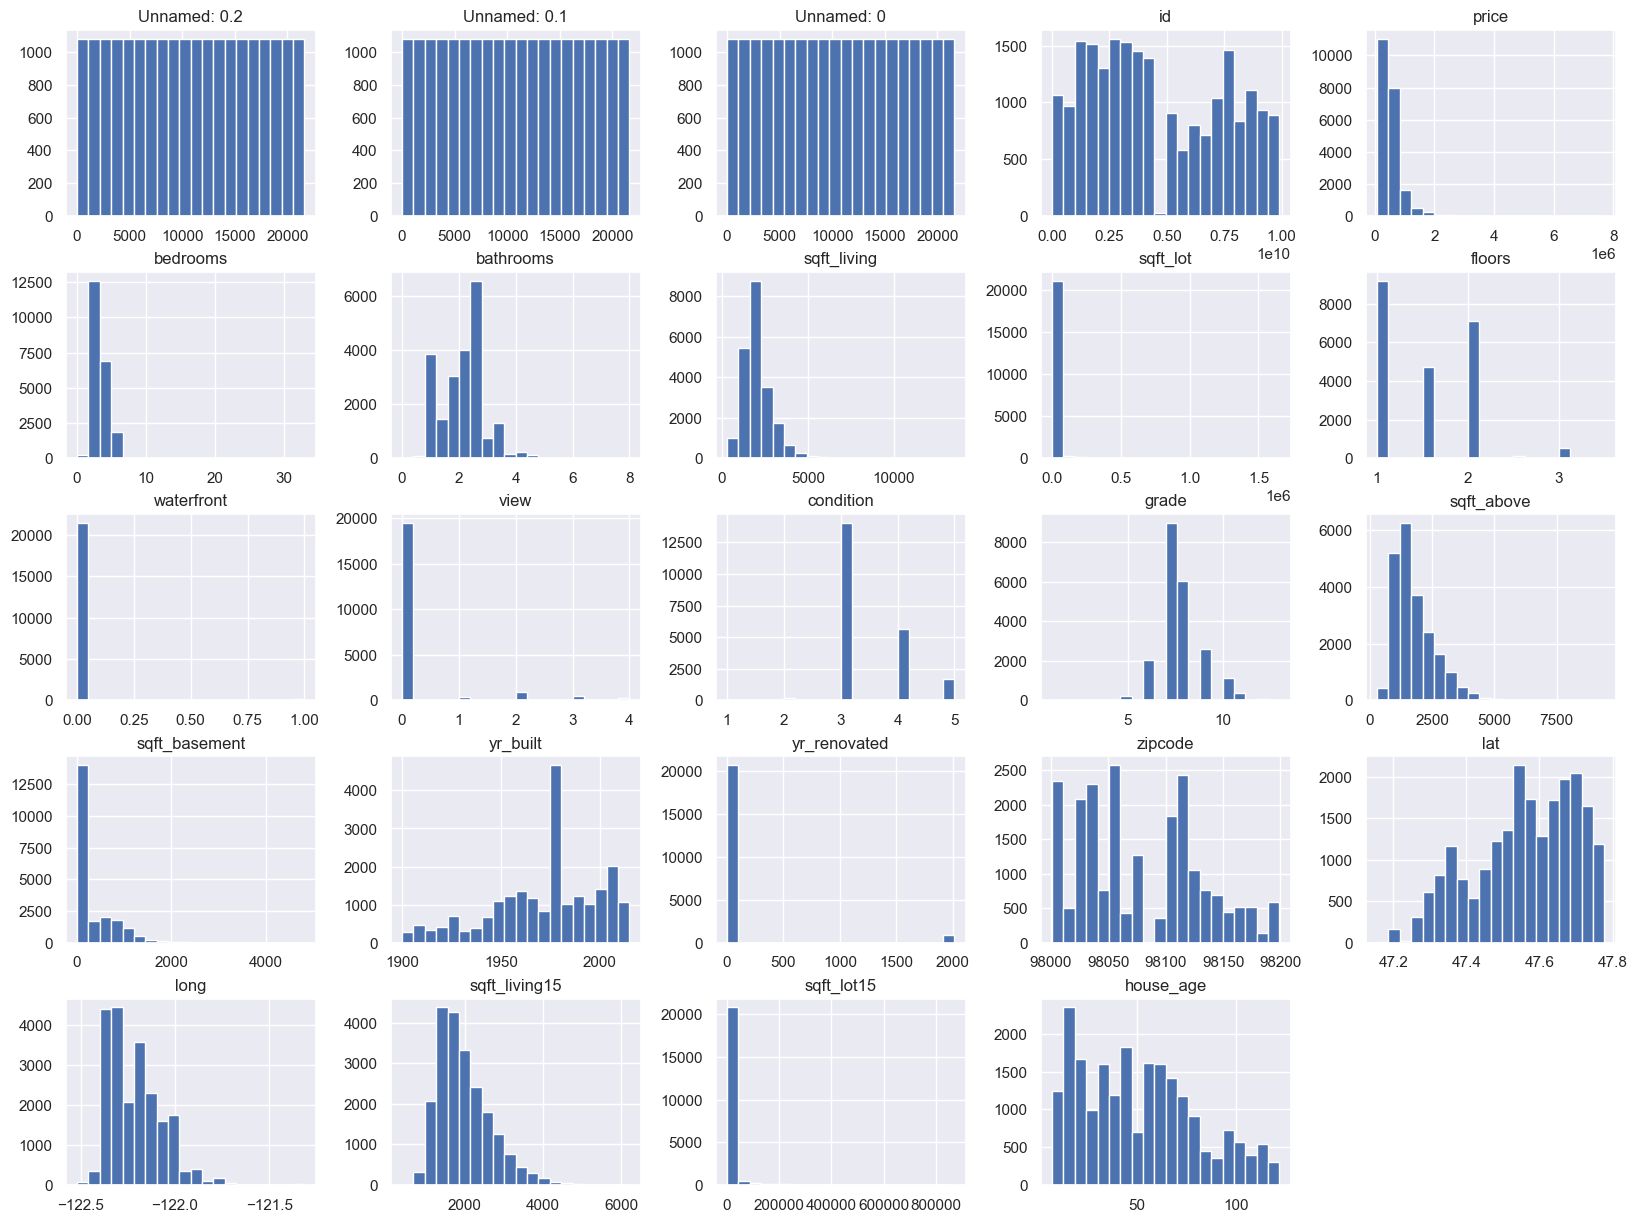

In [19]:
scalar.df.hist(bins=20, figsize=(20,15))
plt.show()

Since the important features (i.e. the one with high correlation with price feature) are mostly normally distributed, we use standardization.

In [20]:
scalar.normalization(exclude_cols=["price"])
scalar.df.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.500000,0.500000,0.500000,0.462602,5.401822e+05,0.102145,0.264352,0.133336,0.008836,0.197566,0.007542,0.058576,0.602357,0.554739,0.164297,0.059403,0.621581,0.041887,0.388585,0.650076,0.253408,0.273198,0.013919,0.382564
std,0.288695,0.288695,0.288695,0.290592,3.673622e+05,0.028177,0.096239,0.064274,0.025091,0.199471,0.086517,0.191579,0.162686,0.097955,0.090799,0.091310,0.237103,0.199345,0.270227,0.222879,0.116967,0.117947,0.031364,0.255421
min,0.000000,0.000000,0.000000,0.000000,7.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000,0.214370,3.219500e+05,0.090909,0.218750,0.091472,0.002738,0.000000,0.000000,0.000000,0.500000,0.500000,0.098684,0.000000,0.478261,0.000000,0.161616,0.506836,0.158638,0.187747,0.005111,0.156522
50%,0.500000,0.500000,0.500000,0.394376,4.500000e+05,0.090909,0.281250,0.123019,0.004300,0.200000,0.000000,0.000000,0.500000,0.500000,0.139254,0.000000,0.652174,0.000000,0.323232,0.668972,0.240033,0.247978,0.008005,0.347826
75%,0.750000,0.750000,0.750000,0.738246,6.450000e+05,0.121212,0.312500,0.160755,0.006159,0.400000,0.000000,0.000000,0.750000,0.583333,0.210526,0.114108,0.800000,0.000000,0.590909,0.839794,0.327243,0.337463,0.010835,0.556522
max,1.000000,1.000000,1.000000,1.000000,7.700000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


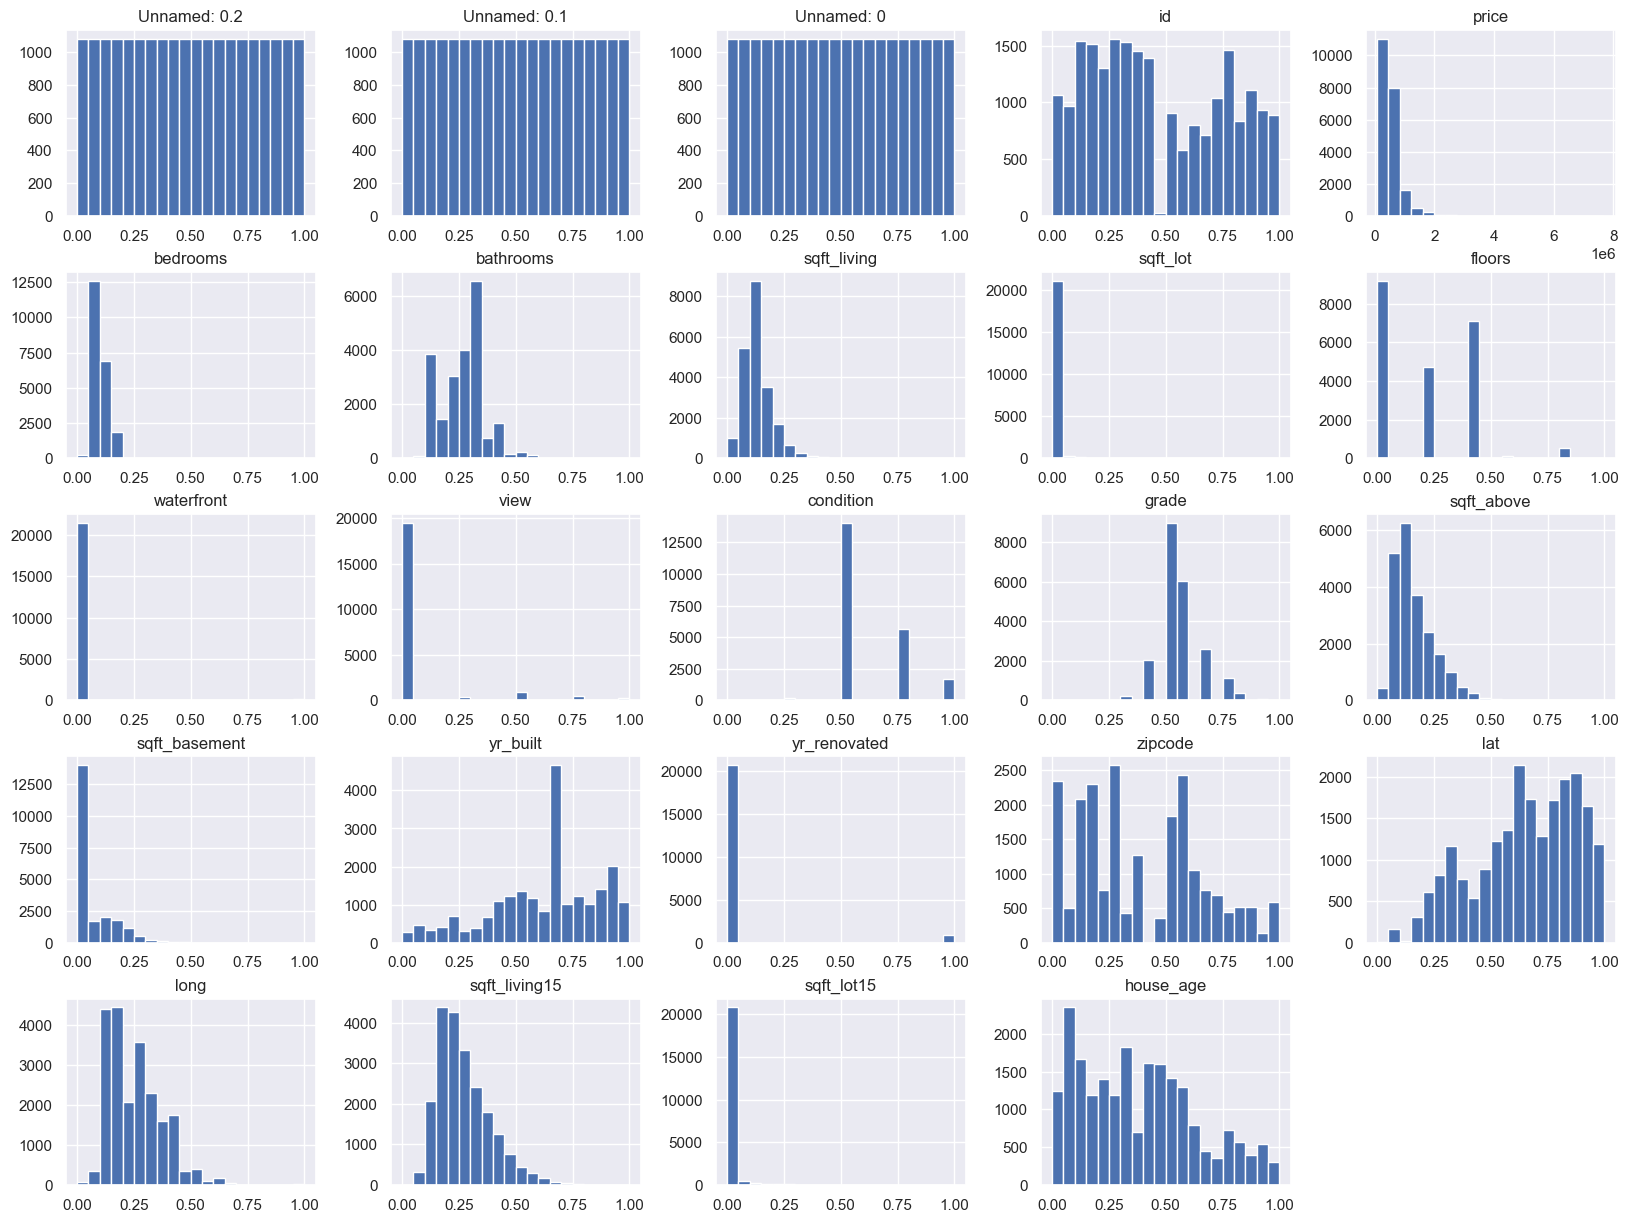

In [21]:
scalar.df.hist(bins=20, figsize=(20,15))
plt.show()

### Q2-4. Categorical values and encoding.

There are many ways to encode the categorical features. Some of them are as follows:

* `Label Encoding`: Assign a number to each category.  
This method is useful when the categories have an order. This is substituting each possible value of a categorical feature with a corresponding number. While label encoding is very simple, it is not always ideal because the numbers do not mean anything and can cause issues if used for calculating distance.  
  > Category 1: 0  
  > Category 2: 1  
  > Category 3: 2

* `One-Hot Encoding`: Create a new feature for each category.
This method is useful when the categories don't have an order. It is the most useful method for the algorithms that use the distance between the data points, such as `KNN`. In this method, an additional feature is added for each categorical value and is marked 0 or 1. While this encoding is more proper, it adds a lot of new binary features which use more memory and can slow the dataset down.
    > Category 1: 1, 0, 0  
    > Category 2: 0, 1, 0  
    > Category 3: 0, 0, 1


* `Binary Encoding`: Encode the categories using binary numbers.
This method is useful when the categories don't have an order. It is somehow similar to the `One-Hot Encoding` method but it uses less memory.
    > Category 1: 00  
    > Category 2: 01  
    > Category 3: 10

* `Frequency Encoding`: Encode the categories using the frequency of the categories.
This method is useful when the categories don't have an order. 
    > Category 1: 0.5  
    > Category 2: 0.25  
    > Category 3: 0.25

* `Target Encoding`: This is the process of replacing a categorical value with the mean of a target variable.  
  To do this, the data is grouped by each categorical value, and the average of a chosen target variable is calculated for that group. If the target is numerical, the categorical values are replaced with their corresponding average of the target. 
   If the target is categorical, the values are replaced with their corresponding probability of the target. 
This method is useful when the categories don't have an order. 
    > Category 1: 0.5  
    > Category 2: 0.25  
    > Category 3: 0.75

In [22]:
class CategoricalEncoder:
    def __init__(self, df: pd.DataFrame):
        self.df = df
        self.cat_cols = df.select_dtypes(include=["category", "object"])
        
        self.encoders = {
            "label": cat_enc.OrdinalEncoder(cols=self.cat_cols.columns),
            "one-hot": cat_enc.OneHotEncoder(cols=self.cat_cols.columns, use_cat_names=True),
            "target": cat_enc.TargetEncoder(cols=self.cat_cols.columns, min_samples_leaf=2, smoothing=1.1),
            "frequency": cat_enc.CountEncoder(cols=self.cat_cols.columns),
            "binary": cat_enc.BinaryEncoder(cols=self.cat_cols.columns),
        }

    def encode(self, mode: str, target: str = None):
        if mode != "target":
            self.df[self.cat_cols.columns] = self.encoders[mode].fit_transform(self.cat_cols)
        else:
            self.df[self.cat_cols.columns] = self.encoders[mode].fit_transform(self.cat_cols, self.df[target])

encoder = CategoricalEncoder(df)
encoder.encode(mode="label")
display(df)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,style,house_age
0,0.000000,0.000000,0.000000,0.720103,1,221900.0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742,1,1,0.521739
1,0.000046,0.000046,0.000046,0.647853,2,538000.0,0.090909,0.28125,0.172075,0.004072,0.2,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.652174,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027,1,2,0.556522
2,0.000093,0.000093,0.000093,0.568795,3,180000.0,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513,2,3,0.713043
3,0.000139,0.000139,0.000139,0.251157,2,604000.0,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996,3,4,0.434783
4,0.000185,0.000185,0.000185,0.197333,4,510000.0,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871,1,5,0.243478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.999815,0.999815,0.999815,0.026467,233,360000.0,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,0.5,0.583333,0.135965,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986,1,3,0.052174
21609,0.999861,0.999861,0.999861,0.666639,53,400000.0,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,0.5,0.583333,0.221491,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523,1,5,0.008696
21610,0.999907,0.999907,0.999907,0.153783,98,402101.0,0.060606,0.09375,0.055094,0.000503,0.2,0.0,0.0,0.5,0.500000,0.080044,0.000000,0.652174,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558,1,2,0.052174
21611,0.999954,0.999954,0.999954,0.029327,131,400000.0,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,0.5,0.583333,0.143640,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731,2,1,0.095652


###  Q2-5. Removing columns.

Some columns like id and Unnamed are unique and wont help us, others like longitude and latitude and zipcode are not crucial in determining price so we drop them. And also features that have low correlation with target.

In [23]:
df = df[price_corr.index.union(["price"])]
df.head(10)

,bathrooms,grade,price,sqft_above,sqft_basement,sqft_living,sqft_living15,view
0,0.12500,0.500000,221900.0,0.097588,0.000000,0.067170,0.161934,0.0
1,0.28125,0.500000,538000.0,0.206140,0.082988,0.172075,0.222165,0.0
2,0.12500,0.416667,180000.0,0.052632,0.000000,0.036226,0.399415,0.0
3,0.37500,0.500000,604000.0,0.083333,0.188797,0.126038,0.165376,0.0
4,0.25000,0.583333,510000.0,0.152412,0.000000,0.104906,0.241094,0.0
5,0.56250,0.833333,1230000.0,0.394737,0.317427,0.387170,0.750473,0.0
6,0.28125,0.500000,257500.0,0.156250,0.000000,0.107547,0.316469,0.0
7,0.18750,0.500000,291850.0,0.084430,0.000000,0.058113,0.215281,0.0
8,0.12500,0.500000,229500.0,0.083333,0.151452,0.123019,0.237653,0.0
9,0.31250,0.500000,323000.0,0.175439,0.000000,0.123019,0.342626,0.0


### Q2-6. Splitting the dataset into train and test sets.
There are some ways to split the dataset into train and test sets. Some of them are as follows:

- Randomly split the dataset into train and test sets
    - This method is the most common method. But it has a problem. If we split the dataset randomly, the train and test sets may not have the same distribution.   
- Split the dataset based on the time
    - This method is useful when we have a time series dataset. But it is not useful in this case.  
- Split the dataset based on the target
    - This method is useful when we have an imbalanced dataset.
- Cross-validation 
    - Which groups the data into *k* parts, and chooses one of them at each iteration and uses it as the test data, while using the rest as training data. *K-fold cross-validation* is simply splitting into *k* parts.

Here we use the first method. And there are also several percentage for dividing, we use 80-20 here.

In [24]:
class DataSplitter:
    def __init__(self, df: pd.DataFrame, train_percent: float = 0.8):
        self.data = df[df.columns.difference(["price"])]
        self.outcome_data = df["price"]
        self.__split(train_percent)

    def __split(self, train_percent: float):
        train_feat, test_feat, train_out, test_out = train_test_split(
                                                    self.data, self.outcome_data, train_size=train_percent, random_state=1)
        self.data_train = train_feat
        self.data_test = test_feat
        self.outcome_train = train_out
        self.outcome_test = test_out
        
dataSplitter = DataSplitter(df)


### Q2-7. Validation set.
In machine learning, a validation set is a subset of the data that is used to evaluate the performance of a trained model. The validation set is typically used to tune the hyperparameter of the model and to estimate the generalization error of the model.
The validation data is used to test the trained model before using the testing data.  
During this step, the classifier hyperparameters are adjusted.
The generalization error is the difference between the performance of the model on the training data and the performance of the model on new, unseen data. 
To estimate the generalization error, we typically split the data into three sets: a training set, a validation set, and a test set. The training set is used to train the model, the validation set is used to tune the hyperparameters of the model and to estimate the generalization error, and the test set is used to evaluate the final performance of the model.
The validation set is used to evaluate the performance of the model during the training process. After each epoch of training, the model is evaluated on the validation set to see how well it is generalizing to new data. This allows us to monitor the performance of the model and to make adjustments to the hyperparameters as needed.
Once the model has been trained and the hyperparameters have been tuned using the validation set, we can evaluate the final performance of the model on the test set. The test set provides an unbiased estimate of the generalization error of the model, since it has not been used during the training or validation process.

In [31]:
df.describe()

,bathrooms,grade,price,sqft_above,sqft_basement,sqft_living,sqft_living15,view
count,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.264352,0.554739,5.401822e+05,0.164297,0.059403,0.133336,0.273198,0.058576
std,0.096239,0.097955,3.673622e+05,0.090799,0.091310,0.064274,0.117947,0.191579
min,0.000000,0.000000,7.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.218750,0.500000,3.219500e+05,0.098684,0.000000,0.091472,0.187747,0.000000
50%,0.281250,0.500000,4.500000e+05,0.139254,0.000000,0.123019,0.247978,0.000000
75%,0.312500,0.583333,6.450000e+05,0.210526,0.114108,0.160755,0.337463,0.000000
max,1.000000,1.000000,7.700000e+06,1.000000,1.000000,1.000000,1.000000,1.000000


## Part 3. Training, Testing and Evaluating the Models.

### **Phase 1.** Linear Regression
Main form of simple linear regression function: 
$$f(x) = \alpha x + \beta$$

here we want to find the intercept($\alpha$) and slope($\beta$) by minimizing the derivation of the RSS function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in term of $\underline{\alpha}$ and $\underline{\beta}$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$ 
$$ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x}$$



Based on the formula above, complete this function to compute the parameters of a simple linear regression

In [26]:
def simple_linear_regression(input_feature, output):
    # TO DO:

    # compute the sum of input_feature and output

    # compute the product of the output and the input_feature and its sum

    # compute the squared value of the input_feature and its sum

    # use the formula for the slope

    # use the formula for the intercept

    return (intercept, slope)

Now complete this function to predict the value of given data based on the calculated intercept and slope

In [27]:
def get_regression_predictions(input_feature, intercept, slope):
    # TO DO:

    # calculate the predicted values:

    return predicted_values

Now that we have a model and can make predictions let's evaluate our model using Root Mean Square Error (RSME). RMSE is the square root of the mean of the squared differences between the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [28]:
def get_root_mean_square_error(predicted_values, output):
    # TO DO:

    # Compute the residuals (since we are squaring it doesn't matter which order you subtract)

    # square the residuals and add them up

    # find the mean of the above phrase

    # calculate the root

    return RMSE

AS you might guessed, the RMSE has no bound and it is not easy to find out the percentage of fitting the model into data with it. instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. Matematically, the R2 score formula is shown as follows:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

In this step, complete the following function to calculate the R2 score of a given input_feature, output, intercept, and slope:

In [29]:
def get_r2_score(predicted_values, output):
    # TO DO:

    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)

    # square the residuals and add them up -> SSres

    # compute the SStot

    # compute the R2 score value

    return R2_score

Now calculate the fitness of the model and explain the outputs

In [30]:
# TO DO:

designated_feature_list = ["sqft_living", "yr_built", "grade", "zipcode"]

for feature in designated_feature_list:
    # TO DO: calculate R2 score and RMSE for each given feature
    pass